In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Fish.csv")
print('Shape of dataset= ', df.shape) # To get no of rows and columns
df.head(5)

Shape of dataset=  (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'},inplace = True) # 'inplace= true' to make change in current dataframe
df.sample(5) # Display random 5 records

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
21,Bream,685.0,31.4,34.0,39.2,15.9936,5.3704
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.isna().sum() # Get sum of all Nan values from each column
#df.isna().values.any()  

Species        0
Weight         0
VerticalLen    0
DiagonalLen    0
CrossLen       0
Height         0
Width          0
dtype: int64

In [6]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [7]:
df_sp = df.Species.value_counts()
df_sp = pd.DataFrame(df_sp)
df_sp.T 

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


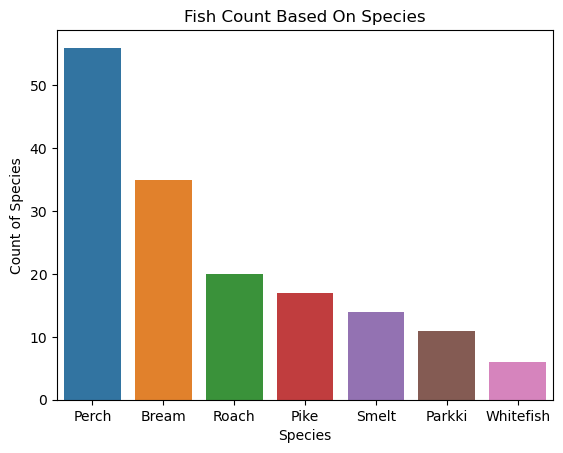

In [8]:
sns.barplot(x= df_sp.index, y = df_sp.Species) # df_sp.index will returns row labels of dataframe
plt.xlabel('Species')
plt.ylabel('Count of Species')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Fish Count Based On Species')
plt.show()

In [9]:
df[df.Weight <= 0]

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [10]:
df1 = df.drop([40])
print('New dimension of dataset is= ', df1.shape)
df1.head(5)

New dimension of dataset is=  (158, 7)


,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
df1.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
VerticalLen,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
DiagonalLen,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
CrossLen,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

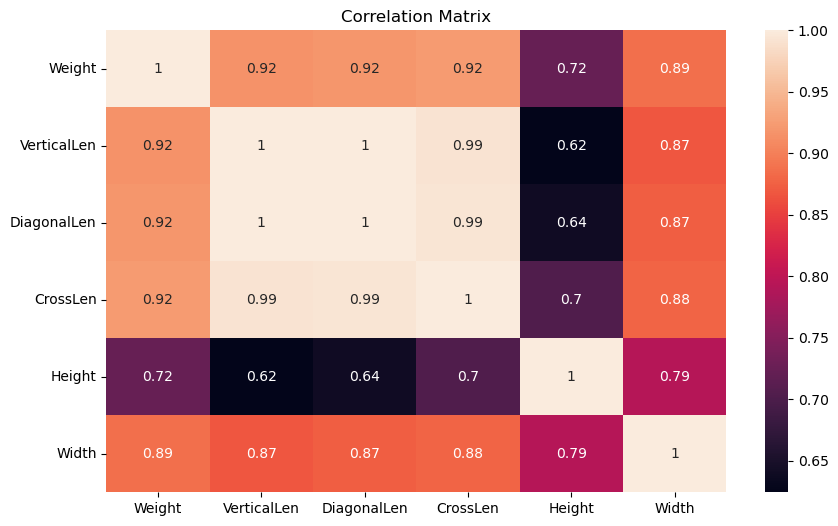

In [12]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
sns.heatmap(df1.corr(), annot =True)
plt.title('Correlation Matrix')

In [13]:
df2 = df1.drop(['VerticalLen', 'DiagonalLen', 'CrossLen'], axis =1) # Can also use axis = 'columns'
print('New dimension of dataset is= ', df2.shape)
df2.head()

New dimension of dataset is=  (158, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


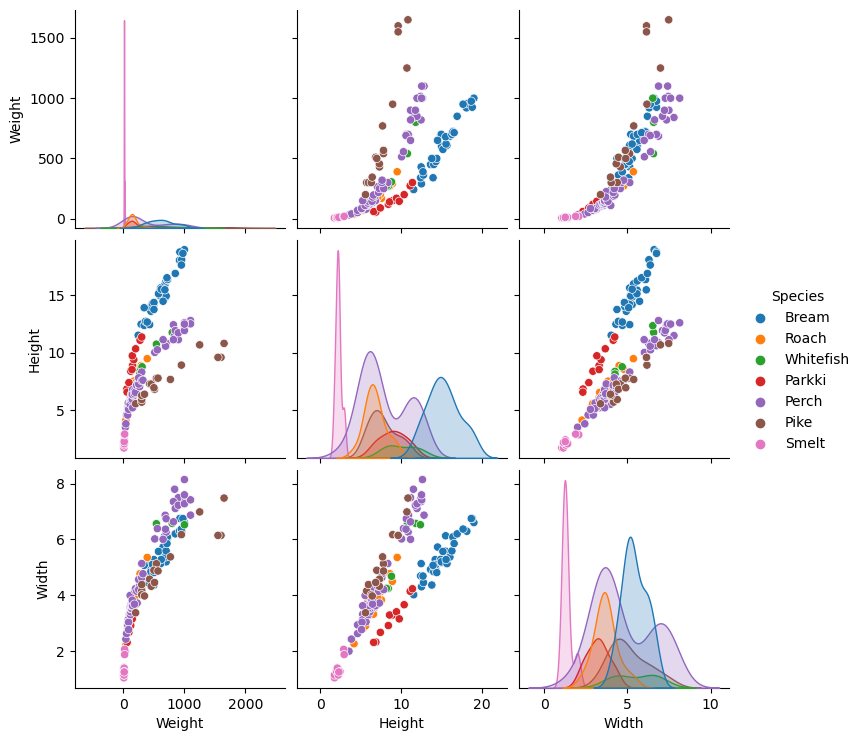

In [14]:
sns.pairplot(df2, kind = 'scatter', hue = 'Species')

In [15]:
#X = df2.iloc[:,[2,3]] # Select columns using column index
X = df2[['Height','Width']] # Select columns using column name
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [16]:
y = df2[['Weight']]
y.head(5)

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


In [17]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42) 
# Use paramter 'random_state=1' if you want keep results same everytime you execute above code
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (126, 2)
X_test dimension=  (32, 2)
y_train dimension=  (126, 1)
y_train dimension=  (32, 1)


In [18]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import joblib
# Evaluate the model
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

# Save the model
joblib.dump(model, 'linear_regression_model.pkl')


Mean Squared Error: 22101.92571590586
R^2 Score: 0.8353560060248509


['linear_regression_model.pkl']

In [20]:
# File: app.py

from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load the model
model = joblib.load('linear_regression_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    height = float(data['height'])
    width = float(data['width'])
    
    prediction = model.predict(np.array([[height, width]]))[0]
    
    return jsonify({'weight': prediction})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
